**Model mengklasifikasi mata normal dan mata Leukocoria**

In [ ]:
!pip install tensorflow

In [ ]:
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline
import os

**Prepare The Dataset**

We prepare the dataset with 2 classes. Leukocoria eye and Normal eye. We put the dataset in drive and GitHub, But in this code, we use drive to access the dataset.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Path Dataset
train_normal_dir = os.path.join('/content/drive/Shareddrives/Capstone/Training/Normal')
validation_normal_dir = os.path.join('/content/drive/Shareddrives/Capstone/Validation/Normal')

train_leukocoria_dir = os.path.join('/content/drive/Shareddrives/Capstone/Training/Leukocoria')
validation_leukocoria_dir = os.path.join('/content/drive/Shareddrives/Capstone/Validation/Leukocoria')

In [ ]:
#Check Dataset
train_name_normal = os.listdir(train_normal_dir)
print('File dalam Training Mata Normal: ', train_name_normal)
train_name_leukocoria = os.listdir(train_leukocoria_dir)
print('File dalam Training Mata Leukocoria: ', train_name_leukocoria)
validation_name_normal = os.listdir(validation_normal_dir)
print('File dalam Validation Mata Normal: ', validation_name_normal)
validation_name_leukocoria = os.listdir(validation_leukocoria_dir)
print('File dalam Validation Mata Leukocoria: ', validation_name_leukocoria)

File dalam Training Mata Normal:  ['r3.png', 'r4.png', 'r1.png', 'r5.jpg', 'r2.png', 'r6.jpg', 'r7.png', 'r8.png', 'r9.png', 'r10.png', 'r11.png', 'r12.png', 'r13.png', 'r14.png', 'r15.png', 'r16.png', 'r17.jpg', 'r18.png', 'r19.png', 'r20.png', 'r21.png', 'r22.png', 'r23.png', 'r24.png', 'r25.png', 'r26.png', 'r27.png', 'r28.png', 'r29.png', 'r30.png', 'r31.png', 'r32.png', 'r33.png', 'r34.png', 'r35.png', 'r36.png', 'r37.png', 'r38.png', 'r39.png', 'r40.png', 'r41.png', 'r42.png', 'r43.png', 'r44.png', 'r45.png', 'r46.png', 'r47.png', 'r48.png', 'r49.png', 'r50.png', 'r51.png', 'r52.png', 'r53.png', 'r54.png', 'r55.png', 'r56.png', 'r57.png', 'r58.png', 'r59.png', 'r60.png', 'r61.png', 'r62.png', 'r63.png', 'r64.png', 'r65.png', 'r66.png', 'r67.png', 'r68.png', 'r69.png', 'r70.png', 'r71.png', 'r72.png', 'r73.png', 'r74.png', 'r75.png', 'r76.png', 'r77.png', 'r78.png', 'r79.png', 'r80.png', 'r81.png', 'r82.png', 'r83.png', 'r84.png', 'r85.png', 'r86.png', 'r87.png', 'r88.png', 'r89.p

In [ ]:
#Check total data
print('Total Training Mata Normal: ', len(os.listdir(train_normal_dir)))
print('Total Training Mata Leukocoria: ', len(os.listdir(train_leukocoria_dir)))
print('Total Validation Mata Normal: ', len(os.listdir(validation_normal_dir)))
print('Total Validation Mata Leukocoria: ', len(os.listdir(validation_leukocoria_dir)))

Total Training Mata Normal:  175
Total Training Mata Leukocoria:  84
Total Validation Mata Normal:  75
Total Validation Mata Leukocoria:  36


# **Pre-Processing Image**

Here we take the images and we augment it so we have many similar images and then we flow them in batches.

In [ ]:
#Rescale Image
train_datagen = ImageDataGenerator(rescale=1/255, rotation_range = 20, horizontal_flip = True, vertical_flip = True, shear_range=0.2, fill_mode='nearest')
validation_datagen = ImageDataGenerator(rescale=1/255, rotation_range = 20, horizontal_flip = True, vertical_flip = True, shear_range=0.2, fill_mode='nearest')

# Flow training images in batches 
train_generator = train_datagen.flow_from_directory(
        '/content/drive/Shareddrives/Capstone/Training/',  
        target_size=(150, 150),  
        batch_size=32,
        
        class_mode='categorical')

# Flow validation images in batches 
validation_generator = validation_datagen.flow_from_directory(
        '/content/drive/Shareddrives/Capstone/Validation/',  
        target_size=(150, 150),  
        batch_size=8,
        
        class_mode='categorical')

Found 259 images belonging to 2 classes.
Found 111 images belonging to 2 classes.


# **CREATE THE MODEL**

In this cell, we make a model with TensorFlow and Keras. We use five Convolution and five MaxPooling2D. We use softmax even though only 2 classes are available, because from our experiments we get better accuracy using softmax than using sigmoid.

In [ ]:
model = tf.keras.models.Sequential([
    # First convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution 
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    #256 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    # 1 output neuron for normal and leukocoria
    tf.keras.layers.Dense(2, activation='softmax')
    ])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(learning_rate=0.001), 
              metrics=['accuracy'])

# **Train The Model**

Here we train the model using 20 epochs and using 8 steps per epoch.

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=20,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/20
8/8 [==============================] - 6s 340ms/step - loss: 0.2743 - accuracy: 0.8855 - val_loss: 0.4860 - val_accuracy: 0.7969
Epoch 2/20
8/8 [==============================] - 3s 441ms/step - loss: 0.2220 - accuracy: 0.9119 - val_loss: 0.6968 - val_accuracy: 0.7031
Epoch 3/20
8/8 [==============================] - 3s 420ms/step - loss: 0.1631 - accuracy: 0.9251 - val_loss: 0.9564 - val_accuracy: 0.6406
Epoch 4/20
8/8 [==============================] - 3s 405ms/step - loss: 0.1378 - accuracy: 0.9339 - val_loss: 0.6410 - val_accuracy: 0.8281
Epoch 5/20
8/8 [==============================] - 3s 331ms/step - loss: 0.2135 - accuracy: 0.9295 - val_loss: 0.5847 - val_accuracy: 0.7812
Epoch 6/20
8/8 [==============================] - 3s 423ms/step - loss: 0.1472 - accuracy: 0.9297 - val_loss: 0.4162 - val_accuracy: 0.8125
Epoch 7/20
8/8 [==============================] - 3s 336ms/step - loss: 0.1259 - accuracy: 0.9559 - val_loss: 0.4962 - val_accuracy: 0.8281
Epoch 8/20
8/8 [====

# **Evaluating The Model**

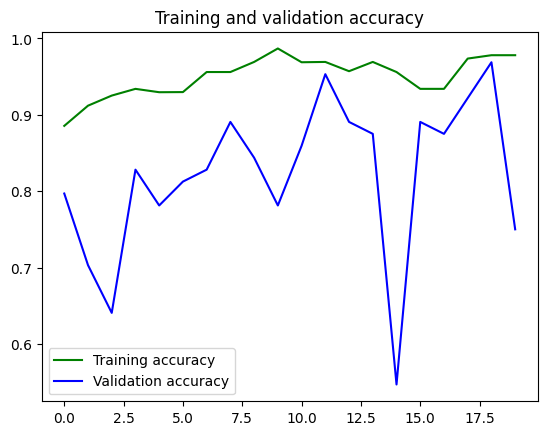

<Figure size 640x480 with 0 Axes>

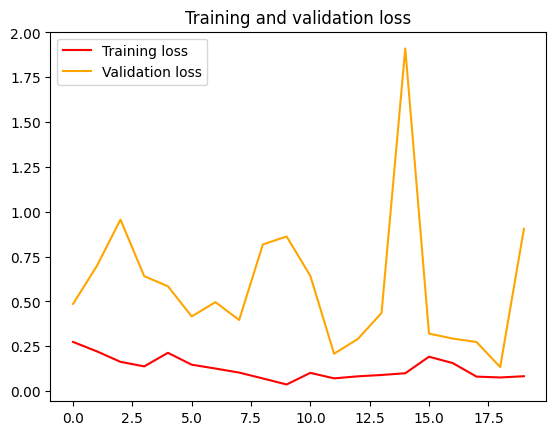

<Figure size 640x480 with 0 Axes>

In [ ]:
#Accuracy
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

epochs = range(len(acc))

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

#Loss
loss=history.history['loss']
val_loss=history.history['val_loss']

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

# **Predict Image**

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = load_img(path, target_size=(150, 150))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  Leukocoria = np.argmax(classes[0])==0
  print(Leukocoria, max(classes[0]))
  if Leukocoria == True:
    print("Leukocoria")
  else:
    print("Normal")

Saving lasttest.jpg to lasttest.jpg
1/1 [==============================] - 0s 20ms/step
False 0.991865
Normal


# Saving The Model

In [ ]:
model.save('Leukocoria_Cekmate.h5')